In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
np.set_printoptions(precision=6, suppress=True)

import seaborn as sns
sns.set_context('paper', font_scale=1.4)
sns.set_style('white')
plt.style.use('dark_background')

rc = plt.rcParams
rc['axes.spines.right'], rc['axes.spines.top'] = 0,0
rc['axes.facecolor'], rc['figure.facecolor'] = (1,1,1,0), (1,1,1,0)
rc['legend.frameon'] = False

%gui qt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spiketag.mvc.Control import controller

/opt/localuser/Work/pydev/vispy/vispy/visuals/line/line.py:392: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('color', np.float32, 4)])
/opt/localuser/Work/pydev/vispy/vispy/visuals/line/arrow.py:55: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('linewidth', np.float32, 1)


In [3]:
from spiketag.base import *

In [ ]:
tritrode = probe(shank_no=1)
tritrode[0] = np.array([0,1,2])
tritrode.mapping[0] = np.array([-90,0])
tritrode.mapping[1] = np.array([90,0])
tritrode.mapping[2] = np.array([0,10])
tritrode.fs = 20000.
tritrode.n_ch = 3
tritrode._group_len = 3
tritrode.reorder_by_chip=False

In [5]:
tritrode.chs

array([0, 1, 2])

In [5]:
!rm tritrode.json

In [6]:
tritrode.show()

/Users/laic/Work/pydev/smart/vispy/vispy/visuals/markers.py:563: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
/Users/laic/opt/anaconda3/lib/python3.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


In [8]:
tritrode.save('./tritrode.json')

In [4]:
prb = probe()
prb.load('./tritrode.json')

In [5]:
ctrl = controller(
                  probe = prb,
                  mua_filename='./cell_0109.bin', 
                  spk_filename='./cell_0109.spk.bin', 
                  binary_radix=11, 
                  scale=False
                 )

2020-09-05 15:57:23,728 - spiketag - INFO - load mua data
2020-09-05 15:57:23,773 - spiketag - INFO - #############  load data  ###################
2020-09-05 15:57:23,774 - spiketag - INFO - ./cell_0109.bin loaded, it contains: 
2020-09-05 15:57:23,775 - spiketag - INFO - 9280040.0 * 3 points (111360480 bytes) 
2020-09-05 15:57:23,776 - spiketag - INFO - 3 channels with sampling rate of 20000.0000 
2020-09-05 15:57:23,777 - spiketag - INFO - 464.002 secs (7.733 mins) of data
2020-09-05 15:57:23,778 - spiketag - INFO - #############################################
2020-09-05 15:57:23,779 - spiketag - INFO - processing folder: ./
2020-09-05 15:57:23,782 - spiketag - INFO - raw data have 9309 spks
2020-09-05 15:57:23,783 - spiketag - INFO - ----------------success------------------
2020-09-05 15:57:23,784 - spiketag - INFO -  
2020-09-05 15:57:23,784 - spiketag - INFO - extract spikes from pivital meta data
2020-09-05 15:57:23,785 - spiketag - INFO - mua.tospk() with time_cutoff=True, am

ERROR: Invoking <bound method PerspectiveCamera.viewbox_resize_event of <TurntableCamera at 0x7efd503fd0d0>> for Event


In [6]:
ctrl.show()

/opt/localuser/Work/pydev/vispy/vispy/gloo/buffer.py:452: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  data = data.view(dtype=[('f0', data.dtype.base, c)])
/opt/localuser/Work/pydev/vispy/vispy/visuals/markers.py:563: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
/opt/localuser/Work/pydev/vispy/vispy/visuals/transforms/linear.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.scale[np.newaxis, :3])
/opt/localuser/anaconda3/lib/python3.7/site-packages/phy-1.0.9-py3.7.egg/phy/plot/visuals.py:520: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the fu

0 [0 0 0 ... 0 0 0]


/opt/localuser/Work/pydev/vispy/vispy/visuals/markers.py:563: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
/opt/localuser/anaconda3/lib/python3.7/site-packages/phy-1.0.9-py3.7.egg/phy/plot/visuals.py:520: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.vstack(_tesselate_histogram(row) for row in hist)


0 [0 0 0 ... 0 0 0]
0 [0 0 0 ... 0 0 0]
0 [0 0 0 ... 0 0 0]
0 [0 0 0 ... 0 0 0]
0 [0 0 0 ... 0 0 0]
0 [0 0 0 ... 0 0 0]
0 [0 0 0 ... 0 0 0]
0 [0 6 0 ... 6 6 0]
0 [0 0 0 ... 0 0 0]


In [243]:
spk_time = ctrl.spk_times_all_in_one_array

In [248]:
spk_time = ctrl.model.gtimes[0]

In [251]:
spk_id = ctrl.model.clu[0].membership

In [254]:
df = pd.DataFrame({'spk_time':spk_time, 'spk_id':spk_id})

In [255]:
df.to_pickle('./spk_matrix.pd')

In [7]:
spk_time = ctrl.spk_times_all_in_one

In [45]:
spk_time.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [57]:
def CCG(spk_time, spike_id, window_bins=50):
    from spiketag.core import correlate as spk_xcorr
    ccg = spk_xcorr(spk_time, 
                    spike_id, np.unique(spike_id), 
                    window_bins=50, bin_size=1)
    return ccg

In [189]:
spk_times, spk_idx = ctrl.model.gtimes[ctrl.current_group], ctrl.clu.membership

In [59]:
ccg = CCG(spk_times, spk_idx)

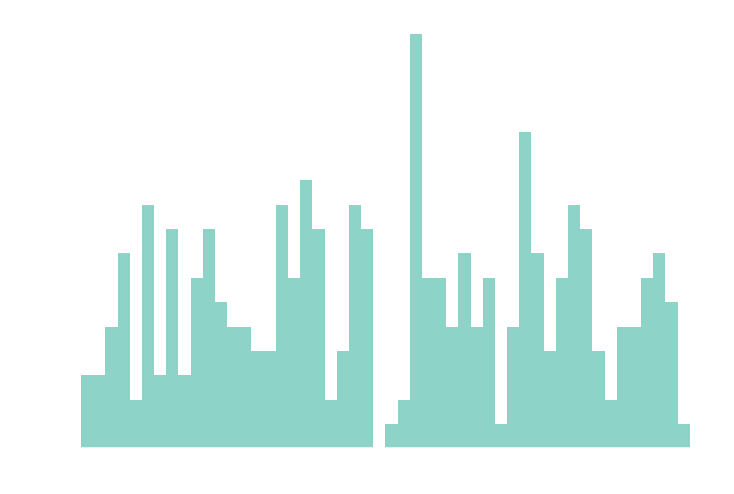

In [60]:
plt.bar(np.arange(-25,25), ccg[4,5], width=1);

In [62]:
ccg.shape

(8, 8, 50)

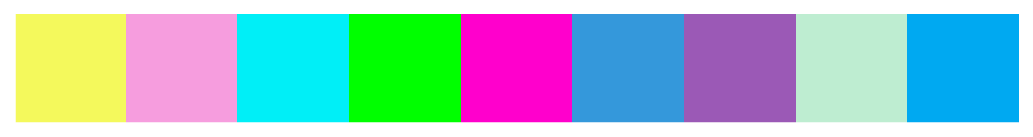

In [75]:
_color = ['#F4F95C', '#F69DDE', '#00EFF7', 
           '#00FF00', '#FF00CC', '#3498db', 
           '#9b59b6', '#BEEDD1', '#00A9F1']
sns.palplot(sns.color_palette(_color))
palette = np.array(sns.color_palette(_color))

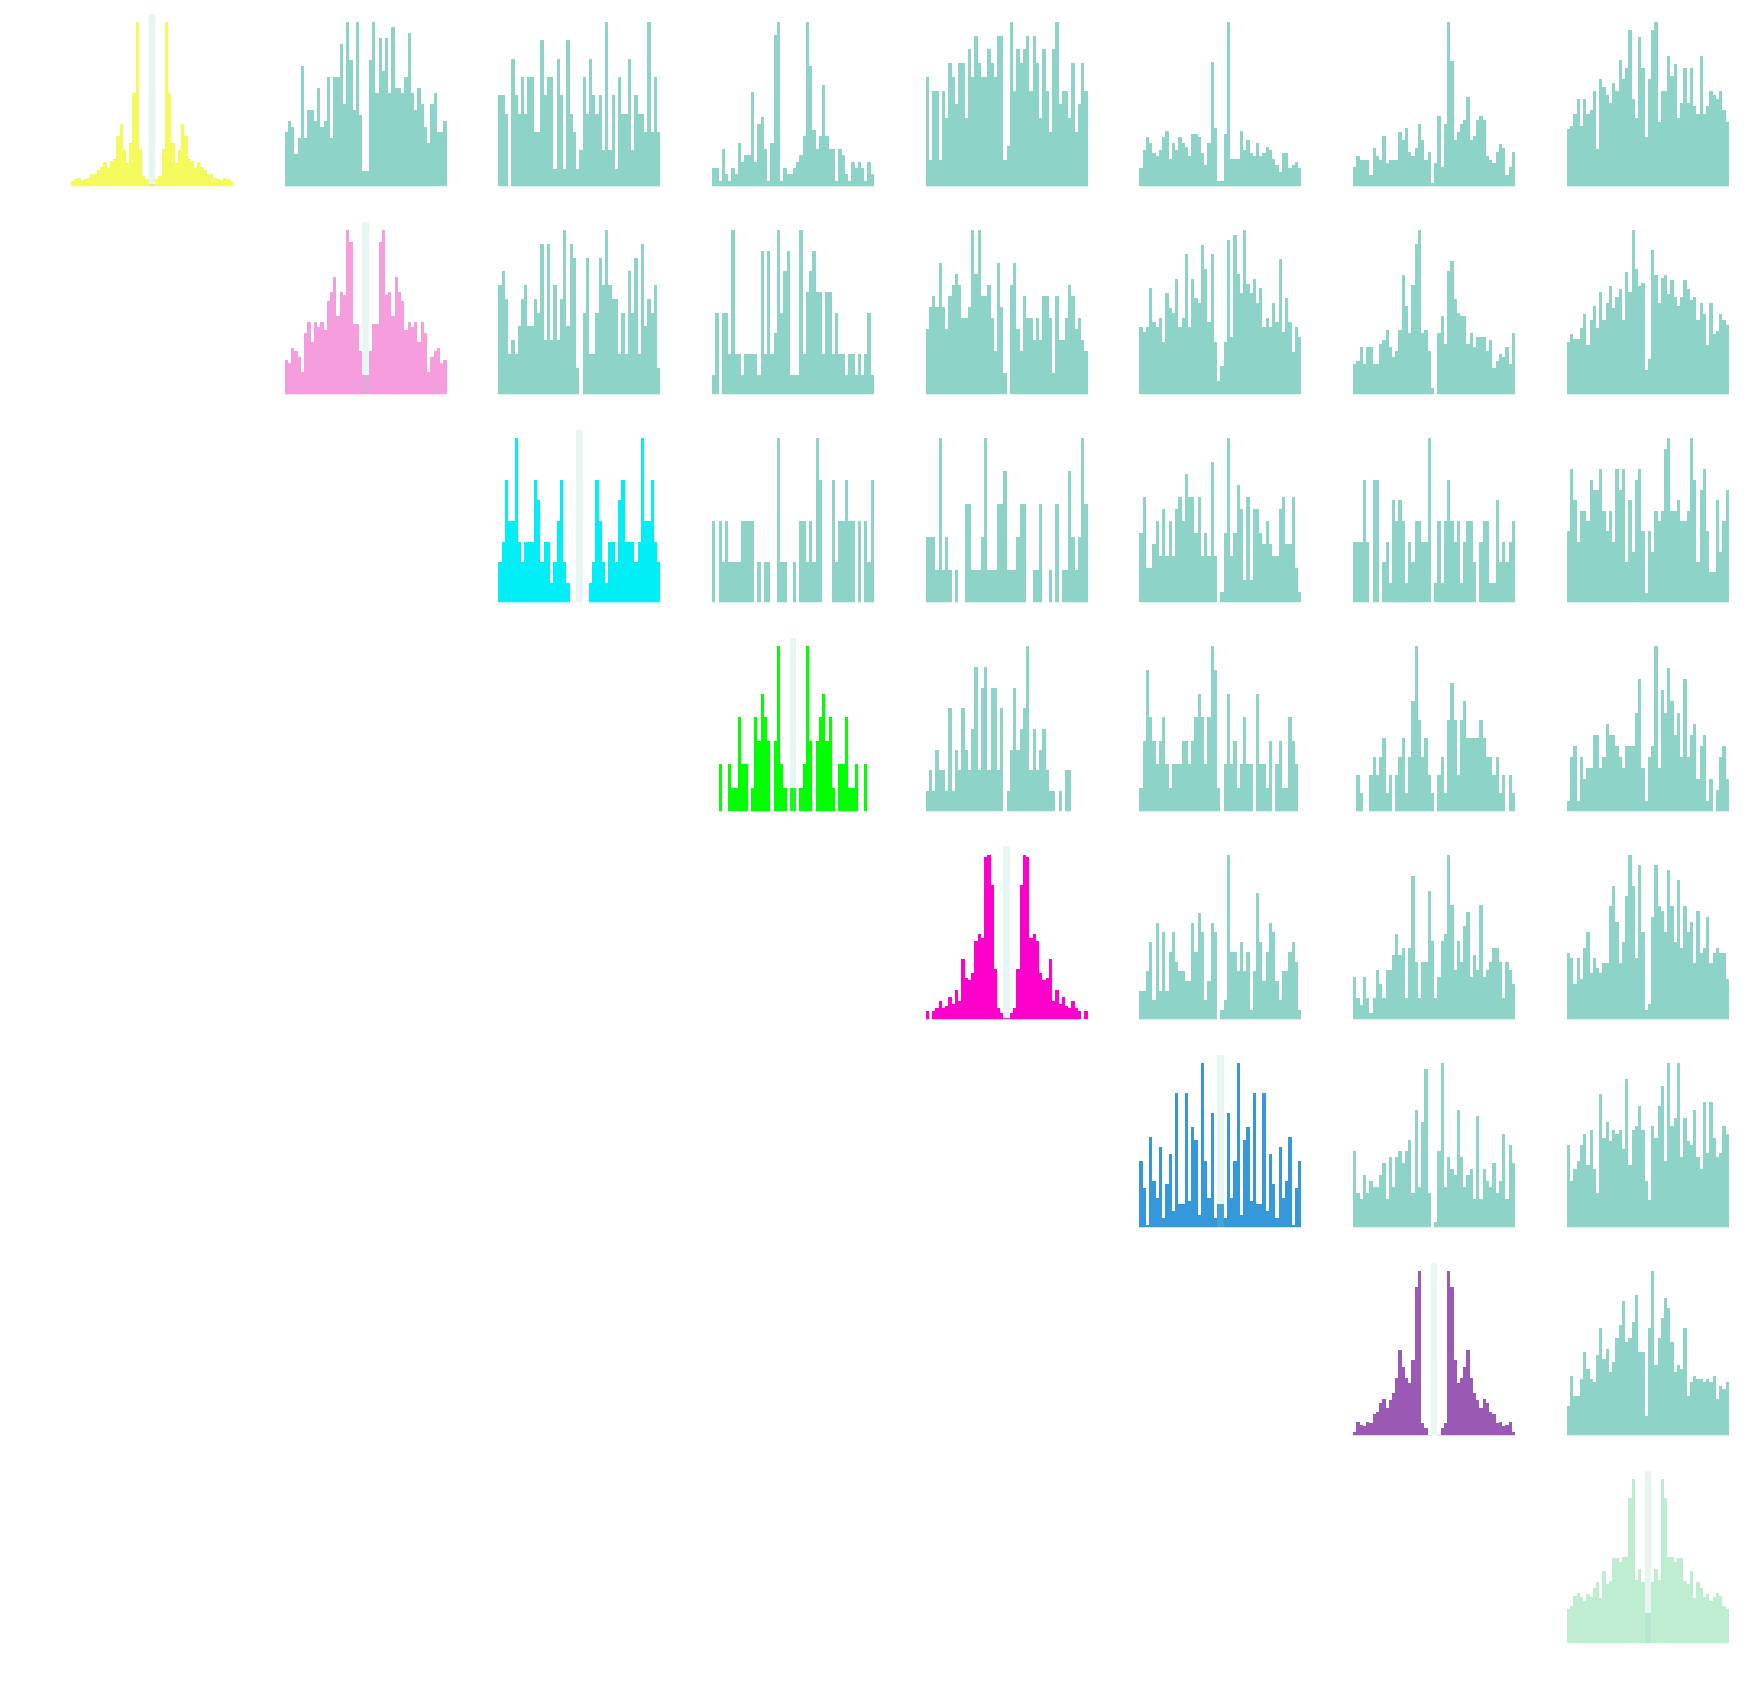

In [94]:
fig, ax = plt.subplots(ccg.shape[0], ccg.shape[1], figsize=(15,15))
for i in range(ccg.shape[0]):
    for j in range(i, ccg.shape[1]):
        if i==j:
            ax[i,j].bar(np.arange(-24.5,25.5), ccg[i,j], width=1, color=palette[i]);
#             ax[i,j].axvline(0)
            ax[i,j].axvspan(-1,1,alpha=.2)
        else:
            ax[i,j].bar(np.arange(-25,25), ccg[i,j], width=1);
# [_ax.set_axis_off() for _ax in ax.ravel()];

In [231]:
def align(time_spike, time_event, window=[-5, 5]):
    n_event = len(time_event)
    time_aligned = np.empty(n_event, dtype=object)
    for i_event in range(n_event):
        if np.isnan(time_event[i_event]):
            time_aligned[i_event] = np.array([])
            continue
        in_time = (time_spike >= time_event[i_event] + window[0]) & (time_spike <= time_event[i_event] + window[1])
        time_aligned[i_event] = time_spike[in_time] - time_event[i_event]
    return time_aligned

In [236]:
align(spk_time[spk_id==1], spk_time[spk_id==0], window=[-5*25, 5*25]).shape

(393,)

In [121]:
def trigger_count(seq_times, ref_times, pre_bin=25, post_bin=25, bin_size=1):
    '''
    find the histrogram of count of `seq_times` around `ref_times`, 
    in a window of [pre_bin, post_bin] with `bin_size` milliseconds
    '''
    triggerred_events = np.zeros((pre_bin+post_bin, ))
    for i, _bin in enumerate(range(-pre_bin, post_bin)):
        for _t in ref_times:
            triggerred_events[i] += np.count_nonzero()
    return triggerred_events

In [225]:
spk_time, spk_id = ctrl.model.gtimes[ctrl.current_group], ctrl.clu.membership

In [226]:
spk_time = spk_time[(spk_id==2) | (spk_id==3)]
spk_id   = spk_id[(spk_id==2) | (spk_id==3)]
spk_id -= spk_id.min()

In [227]:
ccg = CCG(spk_time, spk_id)

In [228]:
ccg

array([[[2, 3, 6, 4, 4, 8, 3, 2, 3, 3, 3, 6, 5, 2, 3, 3, 1, 2, 4, 6, 2,
         1, 0, 0, 0, 0, 0, 0, 1, 2, 6, 4, 2, 1, 3, 3, 2, 5, 6, 3, 3, 3,
         2, 3, 8, 4, 4, 6, 3, 2],
        [2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 0, 4,
         1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 4, 3, 0, 0, 0, 3, 1, 2, 2, 3,
         2, 2, 0, 2, 0, 2, 1, 3]],

       [[3, 1, 2, 0, 2, 0, 2, 2, 3, 2, 2, 1, 3, 0, 0, 0, 3, 4, 1, 2, 1,
         2, 2, 0, 1, 0, 0, 1, 1, 4, 0, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1,
         1, 1, 1, 2, 1, 2, 0, 2],
        [0, 0, 2, 0, 0, 2, 1, 1, 4, 2, 2, 0, 1, 4, 3, 5, 4, 3, 0, 3, 7,
         2, 1, 0, 1, 1, 0, 1, 2, 7, 3, 0, 3, 4, 5, 3, 4, 1, 0, 2, 2, 4,
         1, 1, 2, 0, 0, 2, 0, 0]]])

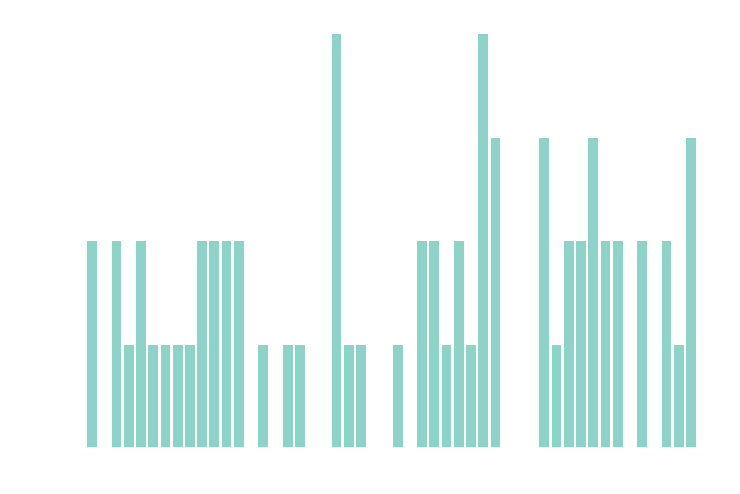

In [230]:
plt.bar(np.arange(-25,25), ccg[0,1]);

In [122]:
psth = trigger_count(ctrl.spk_time[0], ctrl.spk_time[0])

<BarContainer object of 50 artists>

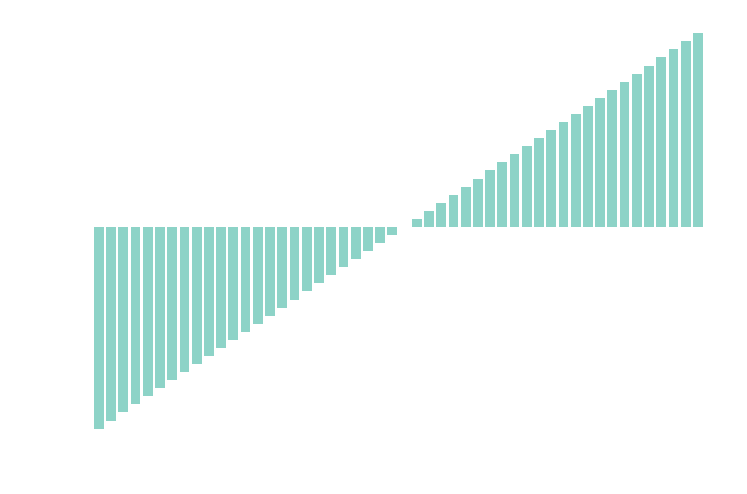

In [123]:
plt.bar(np.arange(-25,25), psth)